In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

What we have to do in this project

1. clean data, remove unnecessary columns
2. find which state(Most) has taken first doses
3. find which state(Most) has taken second doses
4. find how many female taken doses state wise
5. find how many male taken doses state wise
6. find how many people taken CoviShield
7. find how many people taken Covaxin

In [36]:
df = pd.read_csv("covid_vaccine_statewise.csv")
df.head(2)

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0


In [37]:
df.shape

(7845, 24)

In [38]:
df.isnull().sum()

Updated On                                0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [39]:
df1 = df.drop(['Male(Individuals Vaccinated)','Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)'], 
              axis=1, inplace=True)

In [40]:
df.isnull().sum()

Updated On                                0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Total Individuals Vaccinated           1926
dtype: int64

In [41]:
df.drop(['Sputnik V (Doses Administered)', 'AEFI', '18-44 Years (Doses Administered)', '45-60 Years (Doses Administered)',
         '60+ Years (Doses Administered)', '18-44 Years(Individuals Vaccinated)', '45-60 Years(Individuals Vaccinated)',
         '60+ Years(Individuals Vaccinated)', 'Total Individuals Vaccinated'], axis=1, inplace=True)

In [42]:
df.isnull().sum()

Updated On                            0
State                                 0
Total Doses Administered            224
Sessions                            224
 Sites                              224
First Dose Administered             224
Second Dose Administered            224
Male (Doses Administered)           384
Female (Doses Administered)         384
Transgender (Doses Administered)    384
 Covaxin (Doses Administered)       224
CoviShield (Doses Administered)     224
dtype: int64

In [43]:
df.shape

(7845, 12)

In [44]:
df1 = df.dropna()
df1.shape

(7461, 12)

In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7461 entries, 160 to 7838
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Updated On                        7461 non-null   object 
 1   State                             7461 non-null   object 
 2   Total Doses Administered          7461 non-null   float64
 3   Sessions                          7461 non-null   float64
 4    Sites                            7461 non-null   float64
 5   First Dose Administered           7461 non-null   float64
 6   Second Dose Administered          7461 non-null   float64
 7   Male (Doses Administered)         7461 non-null   float64
 8   Female (Doses Administered)       7461 non-null   float64
 9   Transgender (Doses Administered)  7461 non-null   float64
 10   Covaxin (Doses Administered)     7461 non-null   float64
 11  CoviShield (Doses Administered)   7461 non-null   float64
dtypes: float6

In [46]:
df1.isnull().sum()

Updated On                          0
State                               0
Total Doses Administered            0
Sessions                            0
 Sites                              0
First Dose Administered             0
Second Dose Administered            0
Male (Doses Administered)           0
Female (Doses Administered)         0
Transgender (Doses Administered)    0
 Covaxin (Doses Administered)       0
CoviShield (Doses Administered)     0
dtype: int64

In [47]:

df1.drop(df1[df1['State'] == 'India'].index, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_22664\538827623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(df1[df1['State'] == 'India'].index, inplace=True)


In [48]:
df1.head(1)

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered)
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0


Which state taken most doses (First Dose Administered)

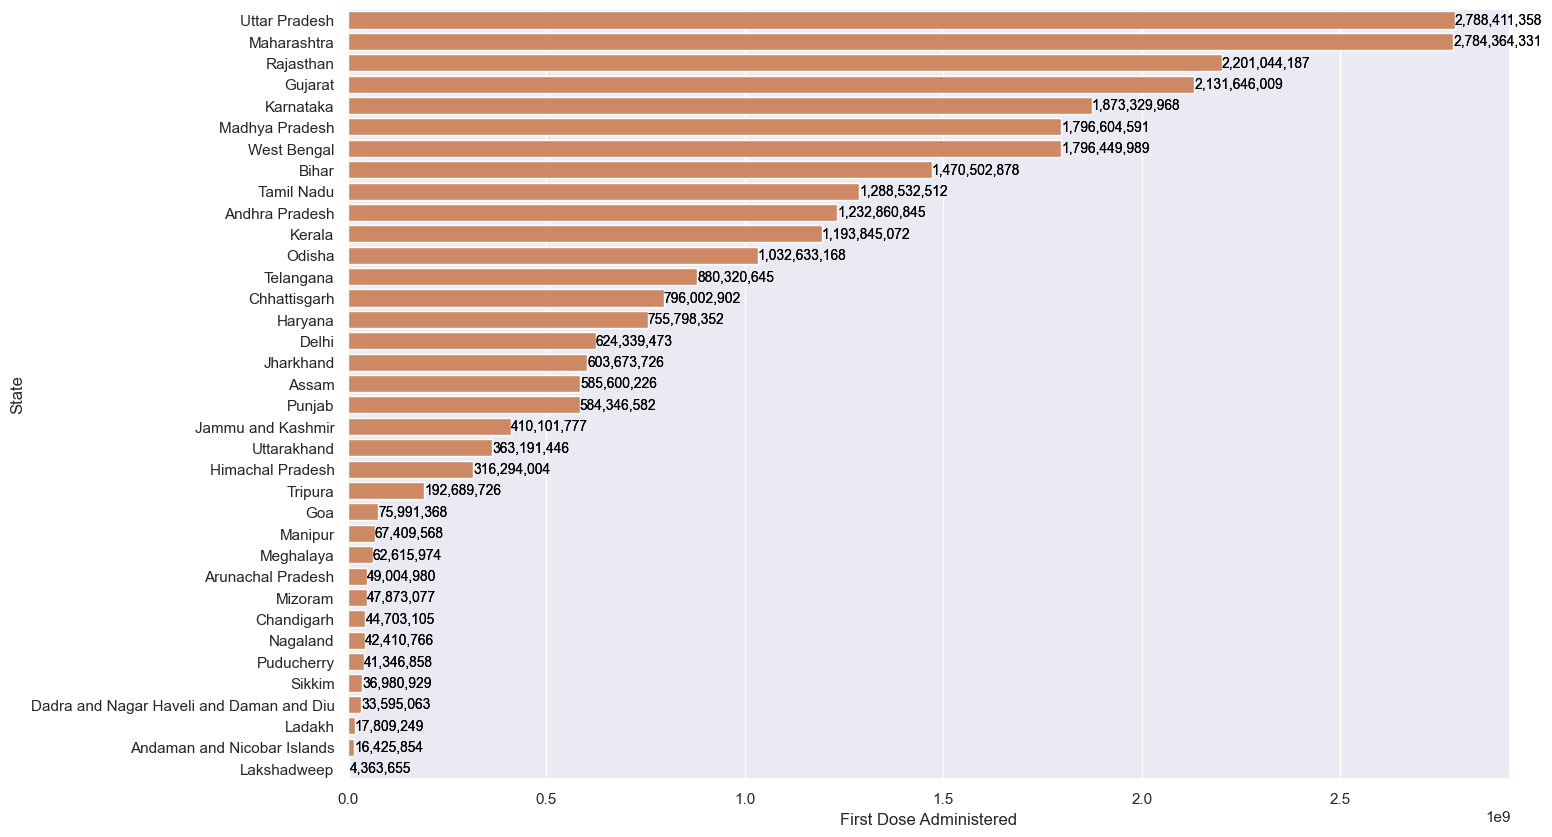

In [60]:
state_cases = df1.groupby(['State'], as_index=False)['First Dose Administered'].sum().sort_values('First Dose Administered', ascending=False)

sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(y = 'State',x= 'First Dose Administered' ,data = state_cases)

ax = sns.barplot(y='State', x='First Dose Administered', data=state_cases)
for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                fontsize=10, color='black')

Which state taken most doses (Second Dose Administered)

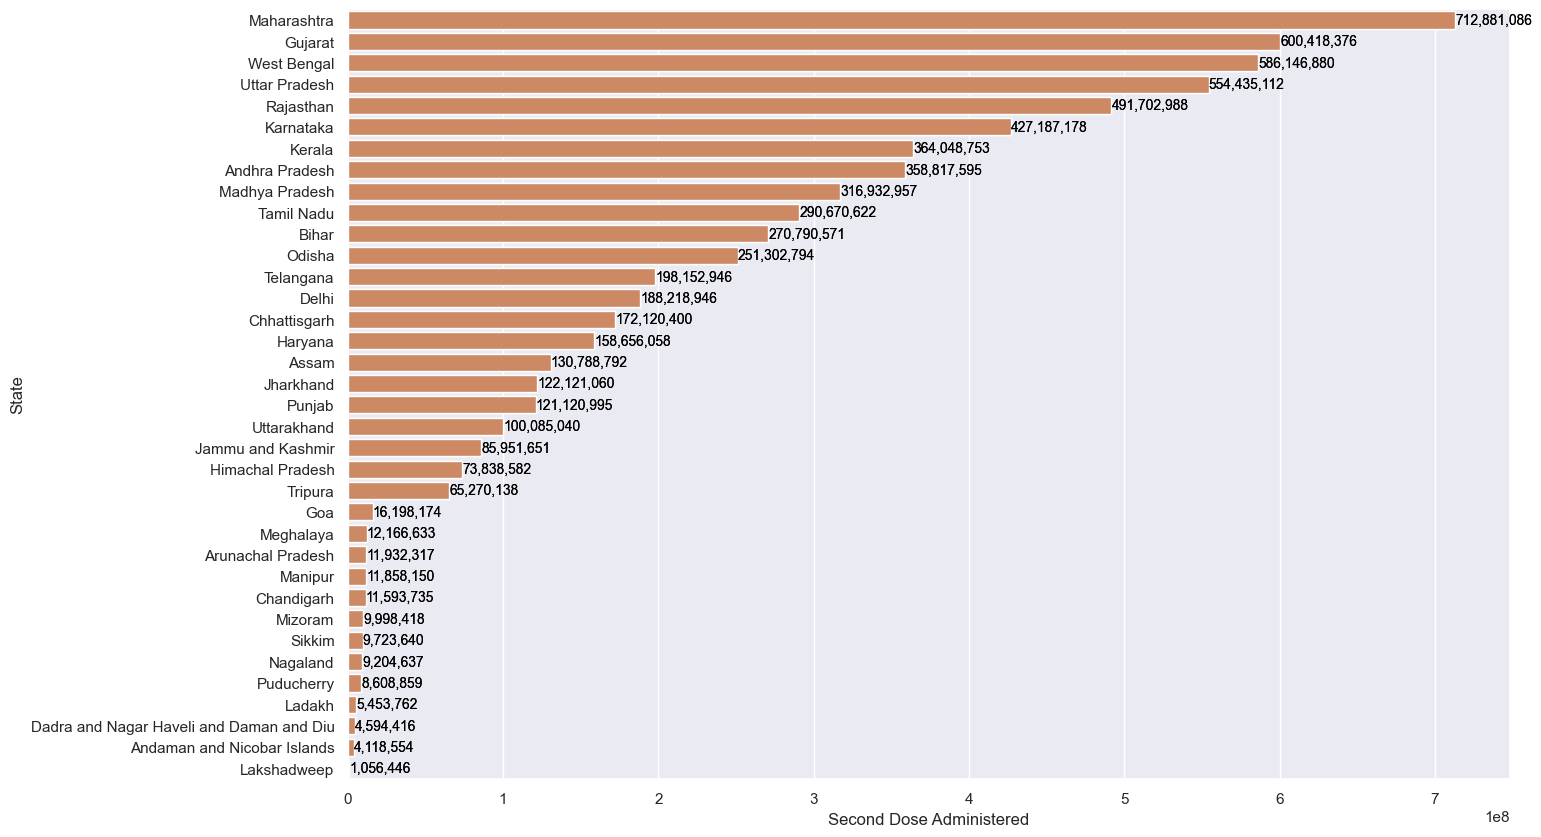

In [58]:
state_cases = df1.groupby(['State'], as_index=False)['Second Dose Administered'].sum().sort_values('Second Dose Administered', ascending=False)

sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(y = 'State',x= 'Second Dose Administered' ,data = state_cases)

ax = sns.barplot(y='State', x='Second Dose Administered', data=state_cases)
for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                fontsize=10, color='black')

How many male taken doses


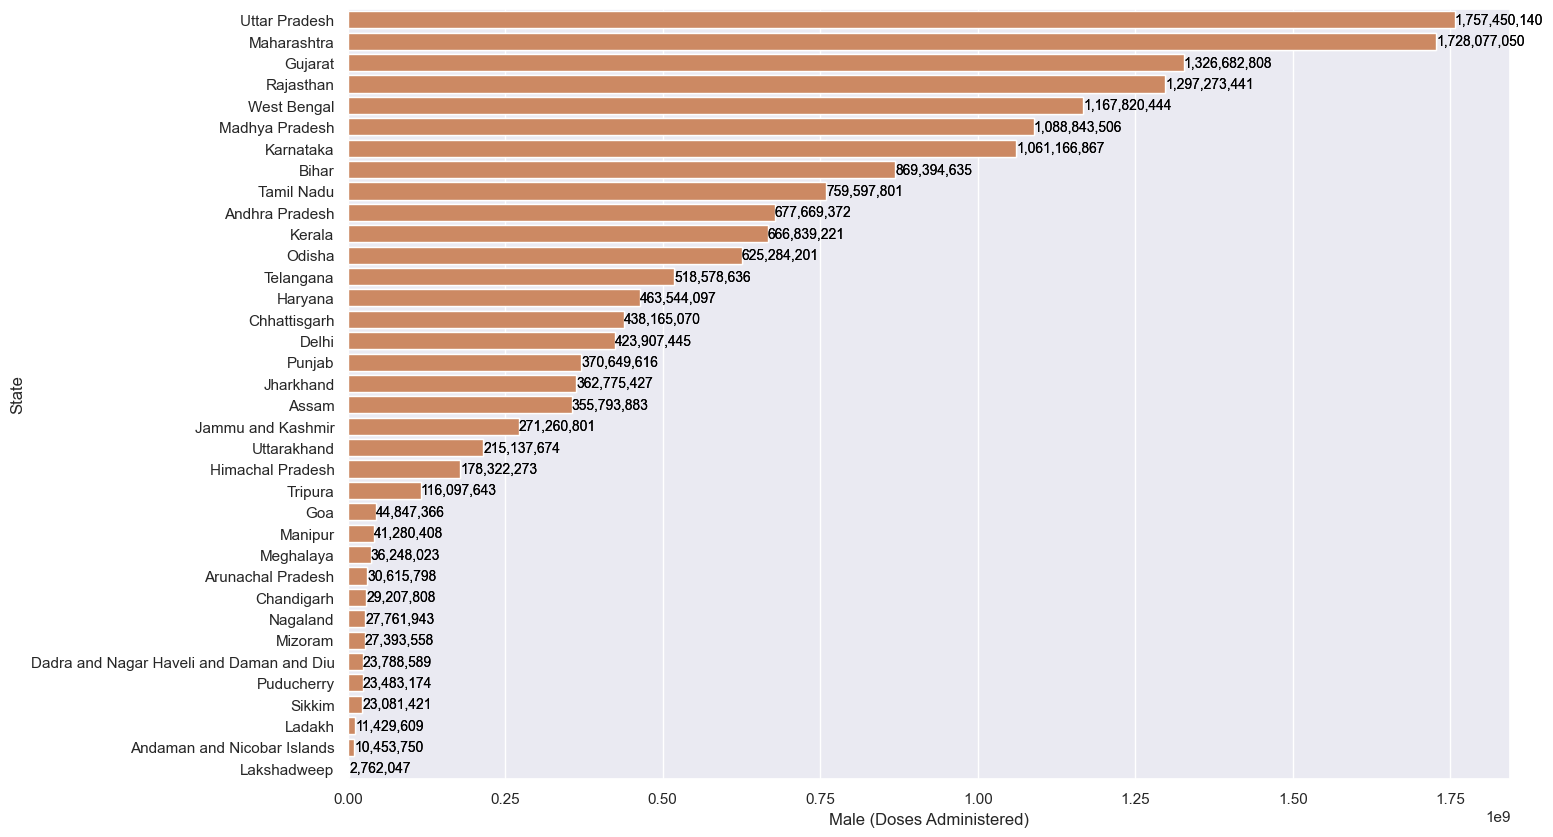

In [62]:
state_cases = df1.groupby(['State'], as_index=False)['Male (Doses Administered)'].sum().sort_values('Male (Doses Administered)', ascending=False)

sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(y = 'State',x= 'Male (Doses Administered)' ,data = state_cases)

ax = sns.barplot(y='State', x='Male (Doses Administered)', data=state_cases)
for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                fontsize=10, color='black')

How many female taken doses

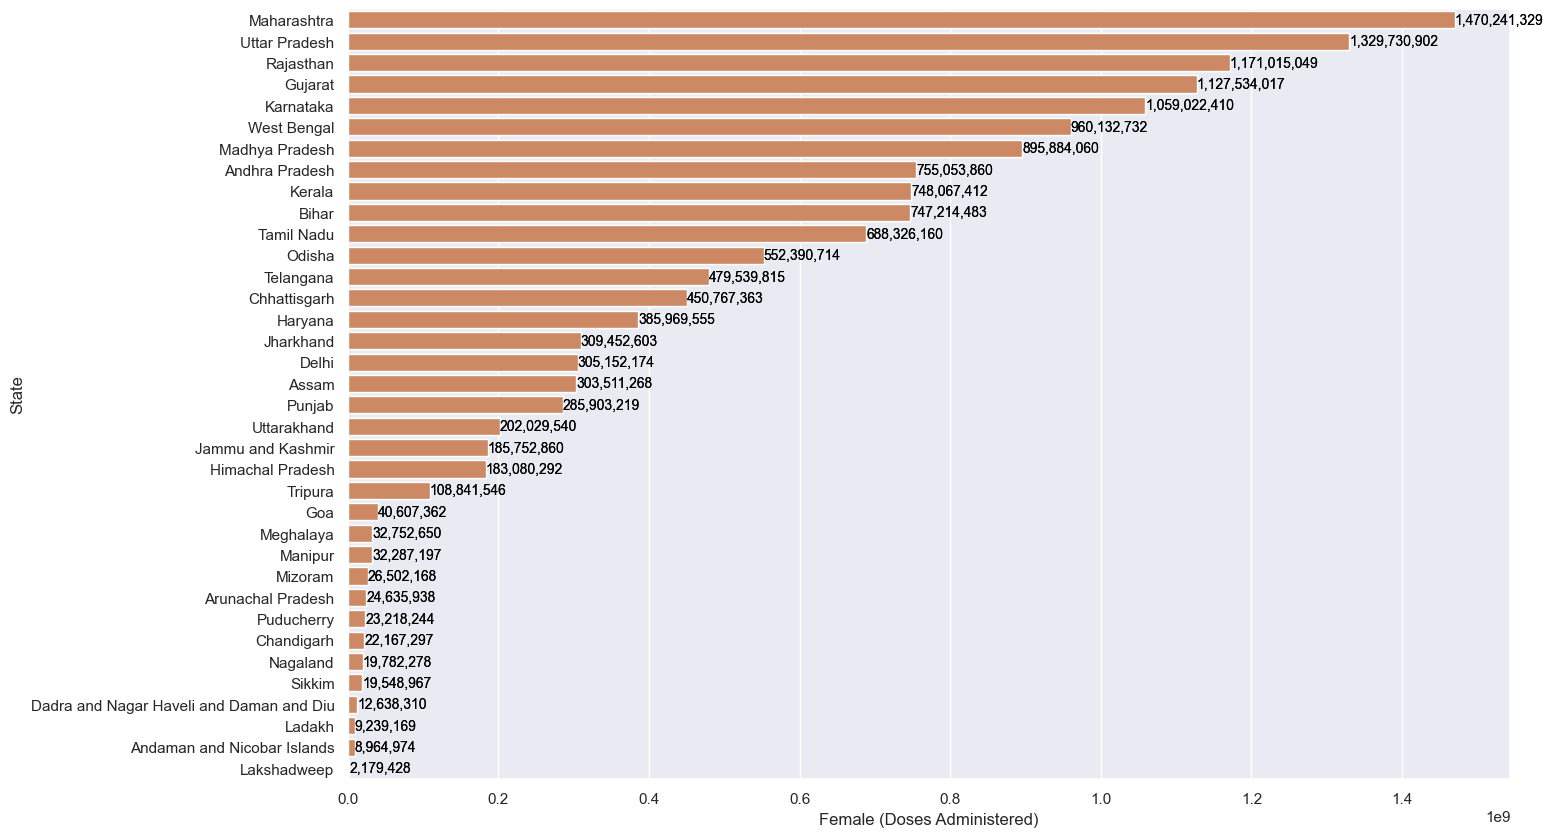

In [63]:
state_cases = df1.groupby(['State'], as_index=False)['Female (Doses Administered)'].sum().sort_values('Female (Doses Administered)', ascending=False)

sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(y = 'State',x= 'Female (Doses Administered)' ,data = state_cases)

ax = sns.barplot(y='State', x='Female (Doses Administered)', data=state_cases)
for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                fontsize=10, color='black')

In [54]:
df1.head(1)

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered)
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0


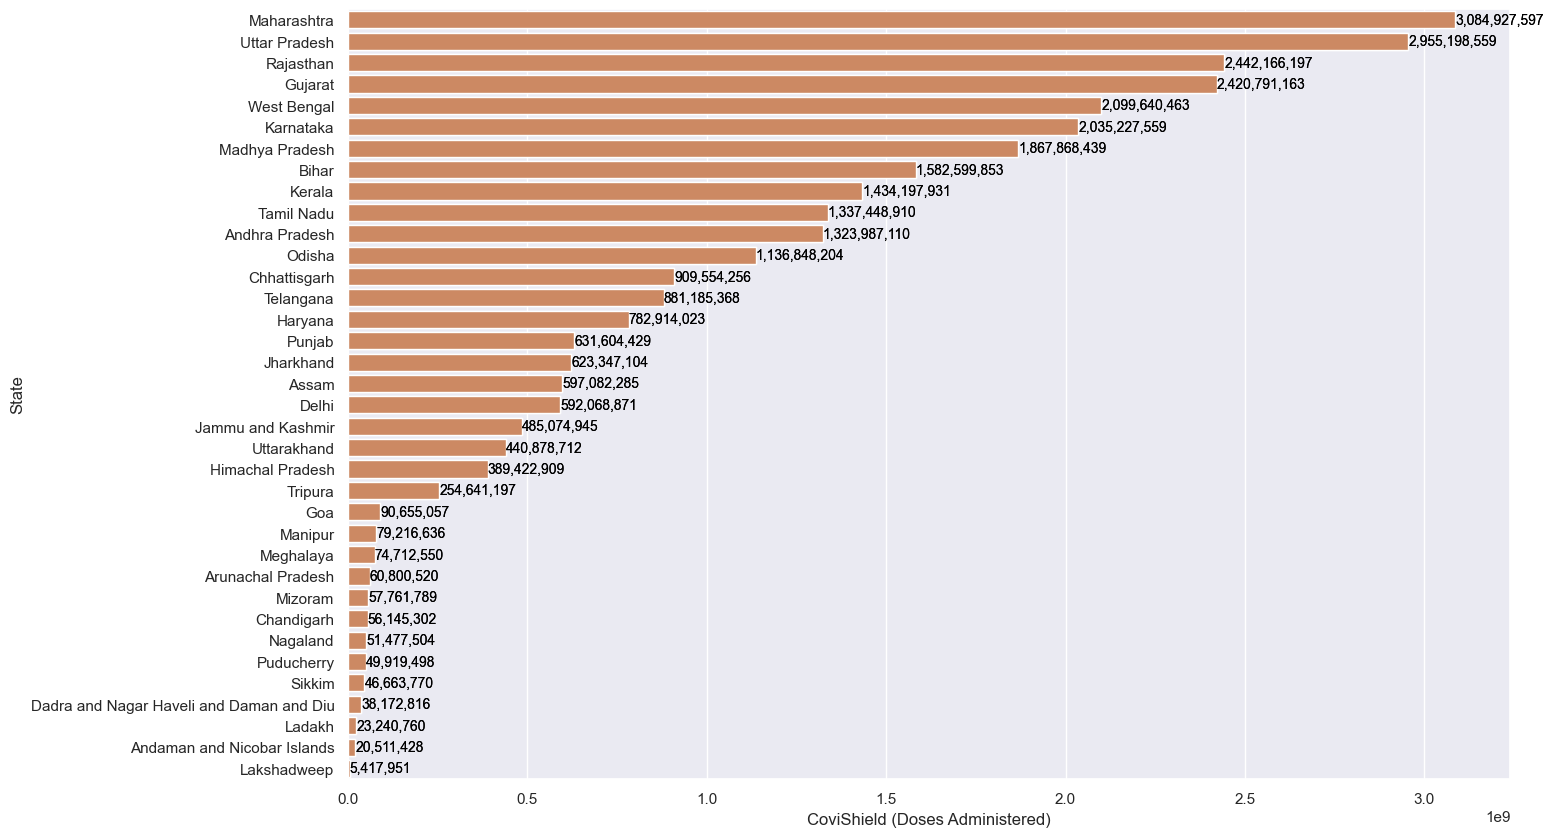

In [64]:
state_cases = df1.groupby(['State'], as_index=False)['CoviShield (Doses Administered)'].sum().sort_values('CoviShield (Doses Administered)', ascending=False)

sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(y = 'State',x= 'CoviShield (Doses Administered)' ,data = state_cases)

ax = sns.barplot(y='State', x='CoviShield (Doses Administered)', data=state_cases)
for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                fontsize=10, color='black')

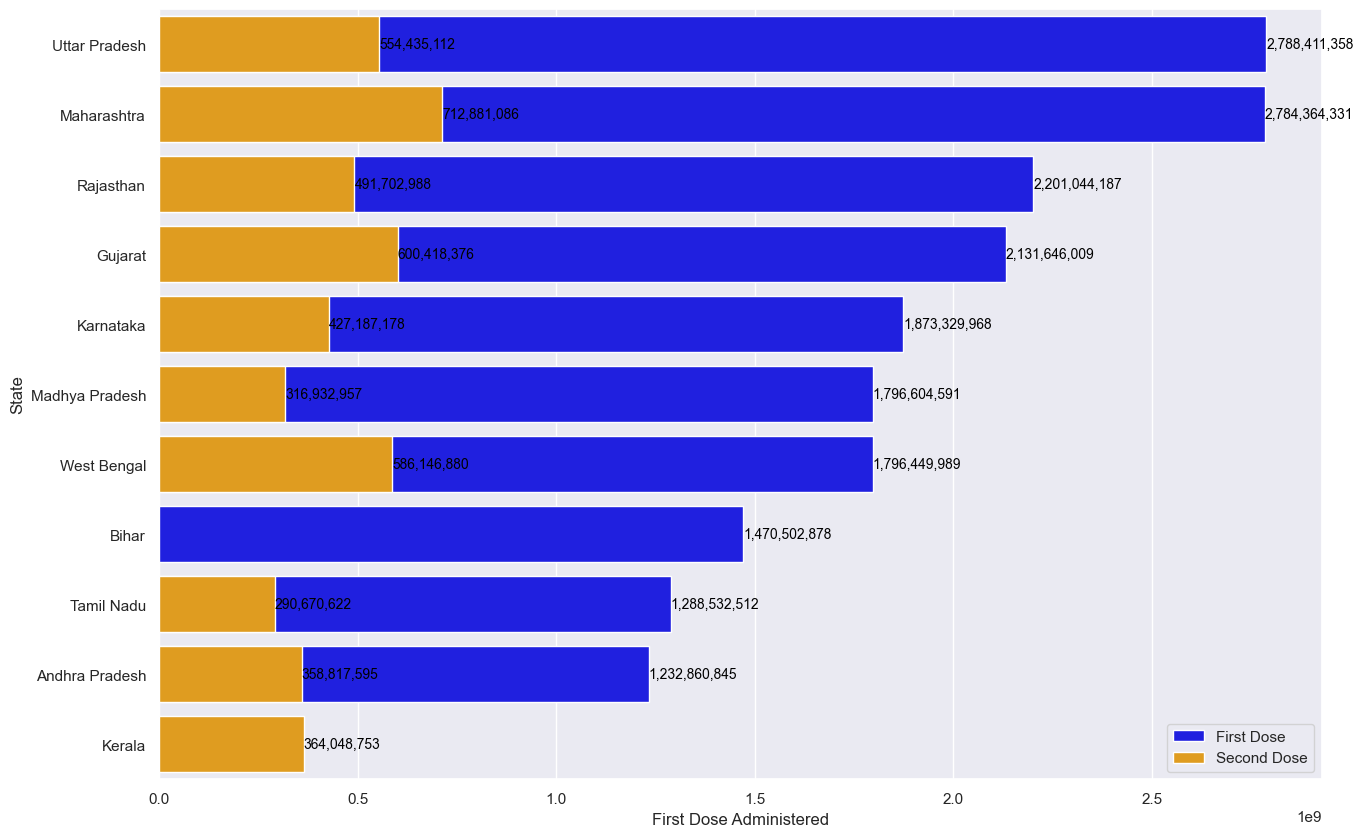

In [70]:


# Grouping data for both doses
first_dose = df1.groupby(['State'], as_index=False)['First Dose Administered'].sum().sort_values('First Dose Administered', ascending=False).head(10)
second_dose = df1.groupby(['State'], as_index=False)['Second Dose Administered'].sum().sort_values('Second Dose Administered', ascending=False).head(10)

# Set the figure size
sns.set(rc={'figure.figsize':(15,10)})

# Create a figure and axes
fig, ax = plt.subplots()

# Plot first dose (bar 1)
sns.barplot(y='State', x='First Dose Administered', data=first_dose, ax=ax, color='blue', label='First Dose')

# Plot second dose (bar 2)
sns.barplot(y='State', x='Second Dose Administered', data=second_dose, ax=ax, color='orange', label='Second Dose')

# Annotate the bars for first dose
for p in ax.patches[:len(first_dose)]:  # First half corresponds to first dose
    ax.annotate(f'{p.get_width():,.0f}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black')

# Annotate the bars for second dose
for p in ax.patches[len(first_dose):]:  # Second half corresponds to second dose
    ax.annotate(f'{p.get_width():,.0f}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black')




Conclusion:
1. Up has taken most first doses
2. Maharashtra has taken most second doses
3. UP male has taken most doses
4. Maharashtra female has taken most doses
5. CoviShield is most taken doses.